In [64]:
import yfinance as yf
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import mplfinance as mpf

In [5]:
#!pip install yfinance

In [9]:
yf.pdr_override()
start=dt.datetime(2020, 1, 1)
now=dt.datetime(2021,6,1)

In [10]:
df=pdr.get_data_yahoo("MSFT",start,now)

[*********************100%***********************]  1 of 1 completed


In [11]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,156.770004,157.770004,156.449997,157.699997,155.329636,18369400
2020-01-02,158.779999,160.729996,158.330002,160.619995,158.205765,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,156.235825,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,156.639694,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,155.211456,21634100
...,...,...,...,...,...,...
2021-05-24,247.789993,251.160004,247.509995,250.779999,250.779999,21411500
2021-05-25,251.770004,252.750000,250.820007,251.720001,251.720001,17704300
2021-05-26,251.429993,252.940002,250.750000,251.490005,251.490005,17771600


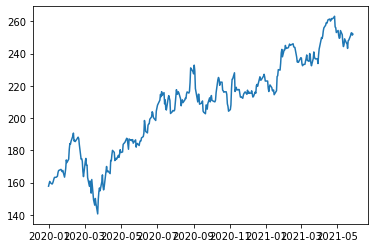

In [43]:
#df["High"].plot(label="High")
plt.plot(df["High"])

In [25]:
pivots=[]
dates=[]
counter=0
lastPivot=0
Range=[0,0,0,0,0,0,0,0,0,0]
dateRange=[0,0,0,0,0,0,0,0,0,0]

In [27]:
for i in df.index:
    currentMax=max(Range,default=0)
    value=round(df["High"][i],2)
    Range=Range[1:9]
    Range.append(value)
    dateRange=dateRange[1:9]
    dateRange.append(i)
    if currentMax==max(Range,default=0):
        counter+=1
    else:
        counter=0
    if counter==5:
        lastPivot=currentMax
        dateloc=Range.index(lastPivot)
        lastDate=dateRange[dateloc]
        pivots.append(lastPivot)
        dates.append(lastDate)
        
print(str(pivots))
print(str(dates))

[168.19, 190.7, 175.0, 180.0, 187.51, 198.52, 216.38, 213.94, 217.64, 232.86, 213.99, 225.21, 228.12, 217.32, 227.18, 246.13, 241.05, 263.19]
[Timestamp('2020-01-21 00:00:00'), Timestamp('2020-02-11 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-05-11 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-07-09 00:00:00'), Timestamp('2020-07-21 00:00:00'), Timestamp('2020-08-03 00:00:00'), Timestamp('2020-09-02 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-29 00:00:00'), Timestamp('2021-02-16 00:00:00'), Timestamp('2021-03-23 00:00:00'), Timestamp('2021-04-27 00:00:00')]


In [60]:
timeD=dt.timedelta(days=44)

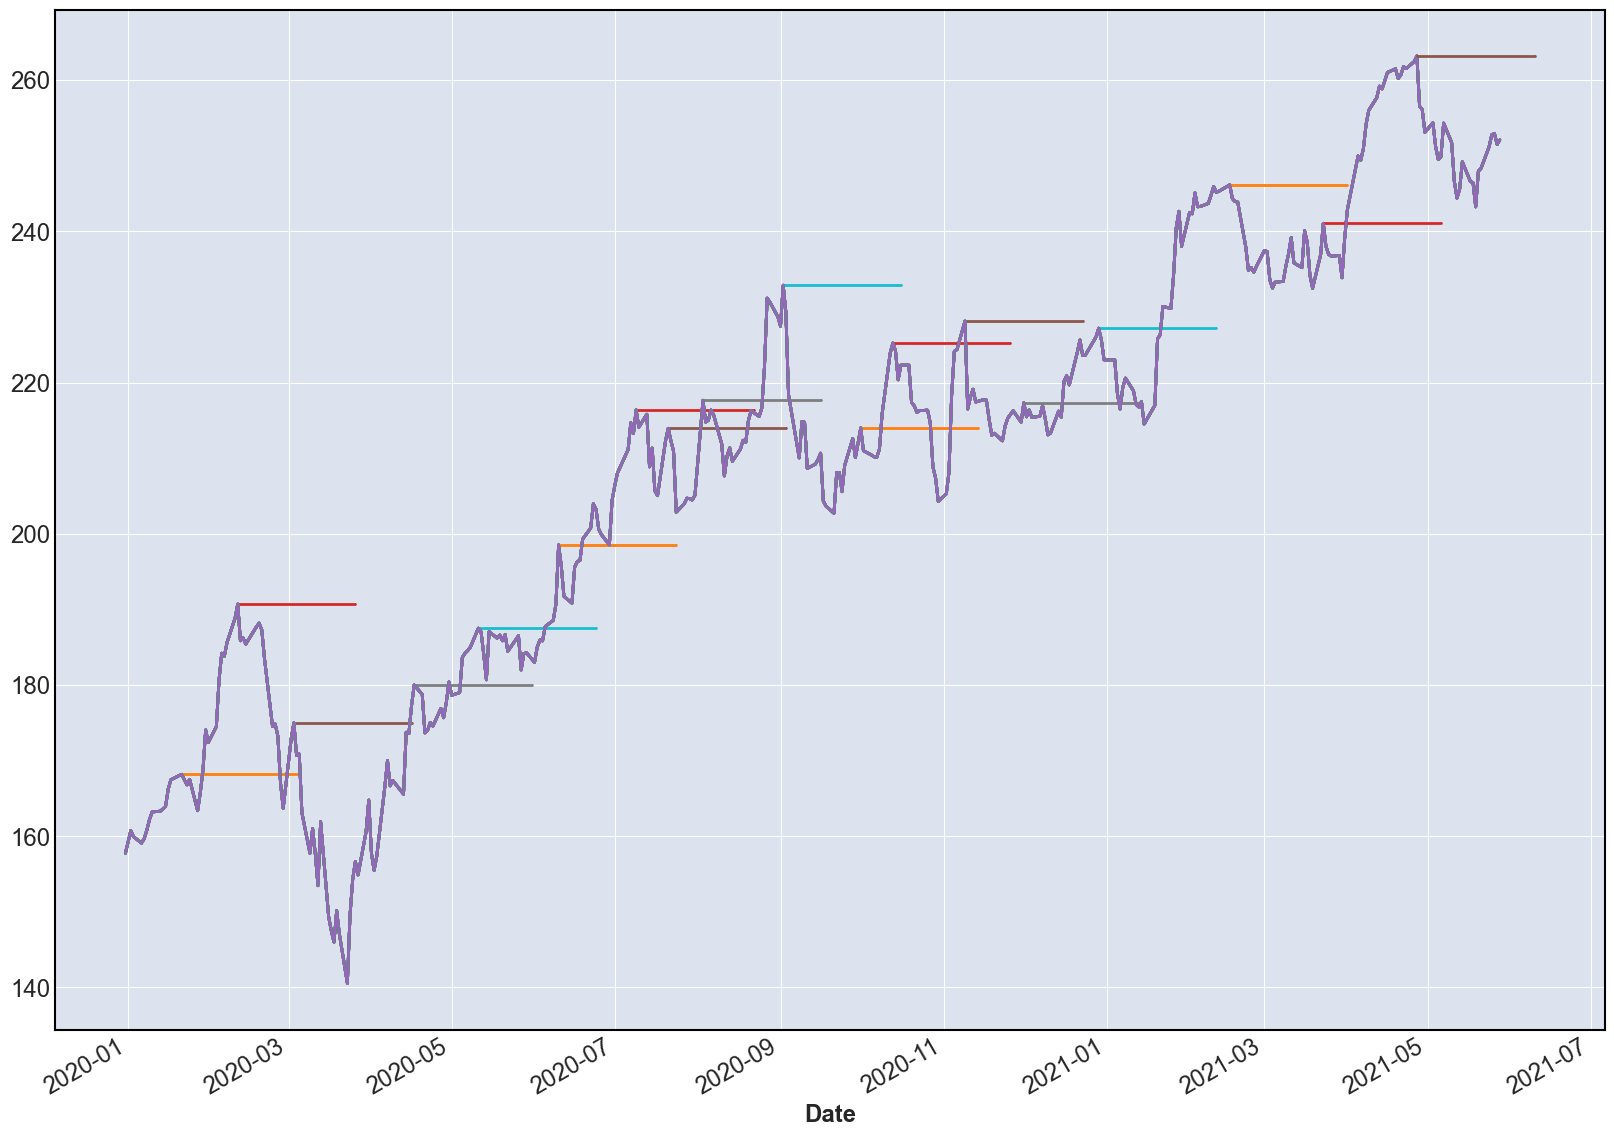

In [73]:

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
#fig= plt.figure(figsize=(15,5))

#axes= fig.add_axes([0,0,0.8,0.8])
for index in range(len(pivots)):
    #print(str(pivots[index])+"      "+str(dates[index]))
    df["High"].plot(label="High")
    
    plt.plot_date([dates[index],dates[index]+timeD],[pivots[index],pivots[index]], linestyle="-", linewidth=2, marker=",")
plt.show()
    

In [68]:
# for index in range(len(pivots)):
#     #print(str(pivots[index])+"      "+str(dates[index]))
#     df["High"].plot(label="High")
#     ap = mpf.make_addplot([[dates[index],dates[index]+timeD],[pivots[index],pivots[index]]],type='ohlc')
#     #ap=plt.plot_date([dates[index],dates[index]+timeD],[pivots[index],pivots[index]], linestyle="-", linewidth=2, marker=",")
#     mpf.plot(df,type='candle',volume=True,addplot=ap)
# plt.show()

In [ ]:

mpf.plot(df,type='candle',volume=True,addplot=ap2)